## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Nombre y Apellido

***
## Estimación espectral


In [6]:
## Inicialización del Notebook del TP3

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################

#Config Tamaño de Plots
plt.rcParams['figure.figsize'] = [16, 8]


<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

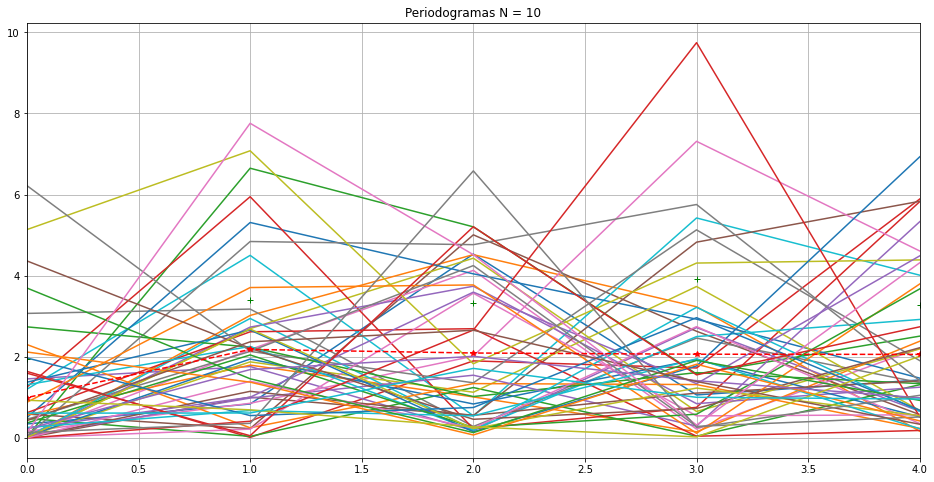

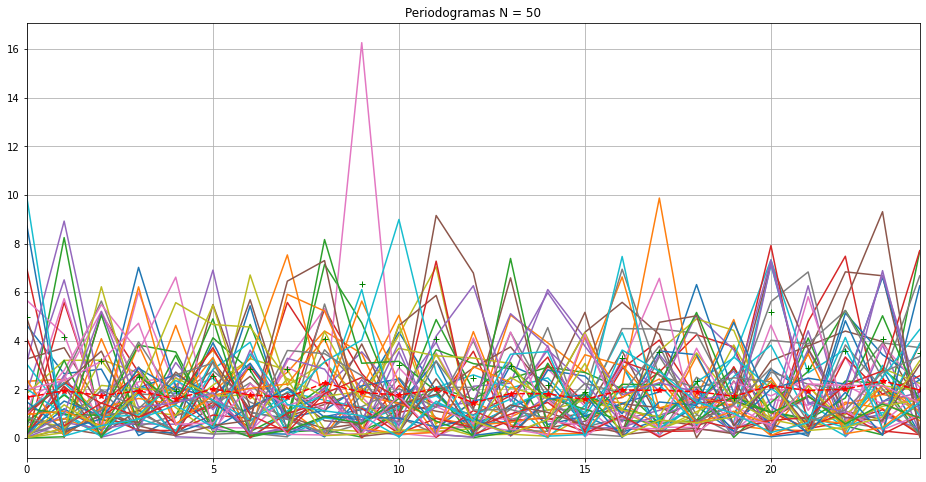

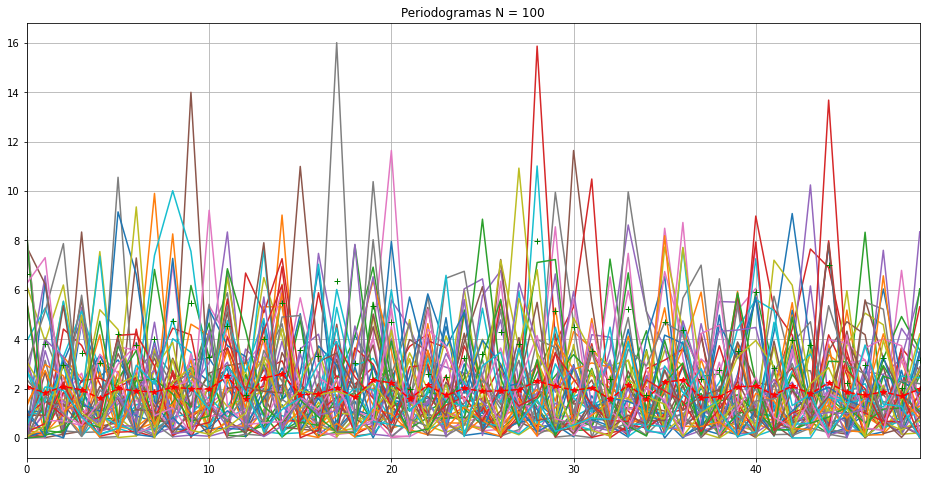

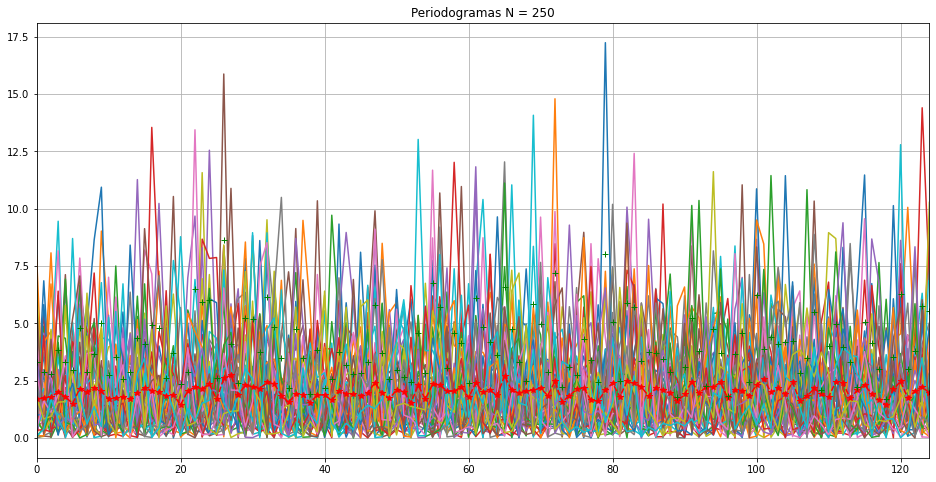

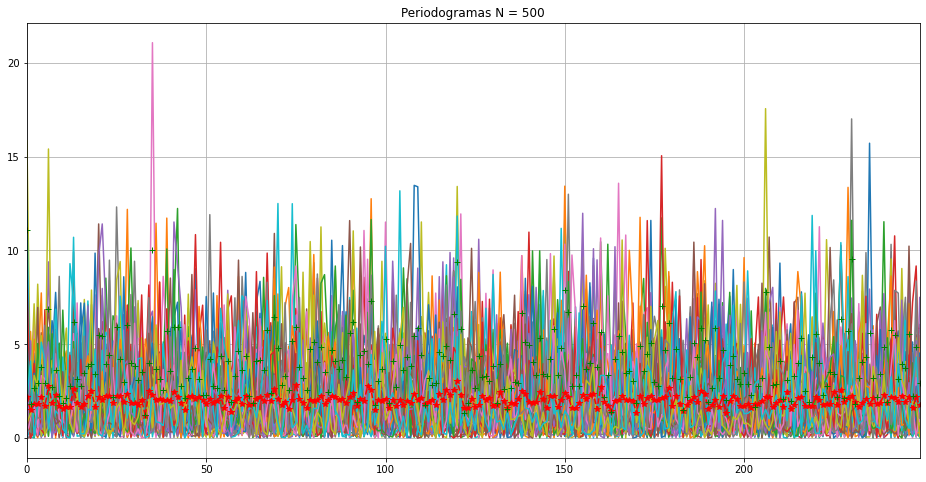

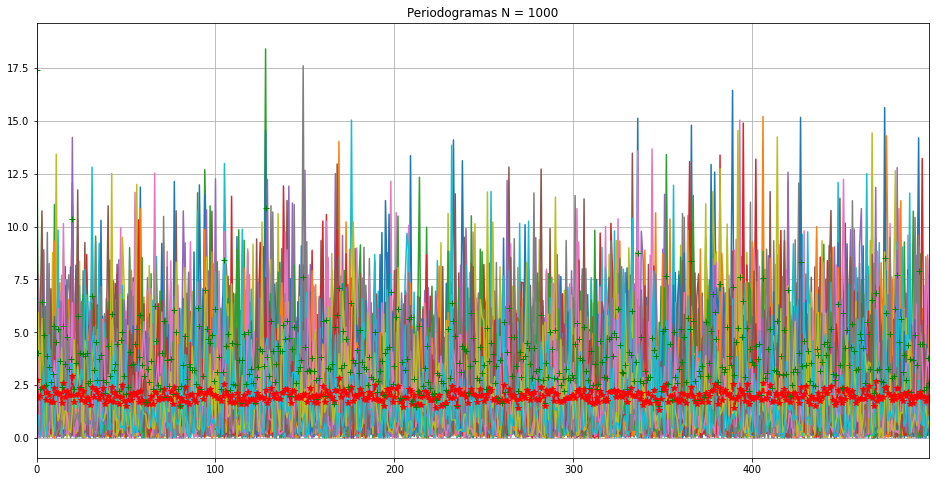

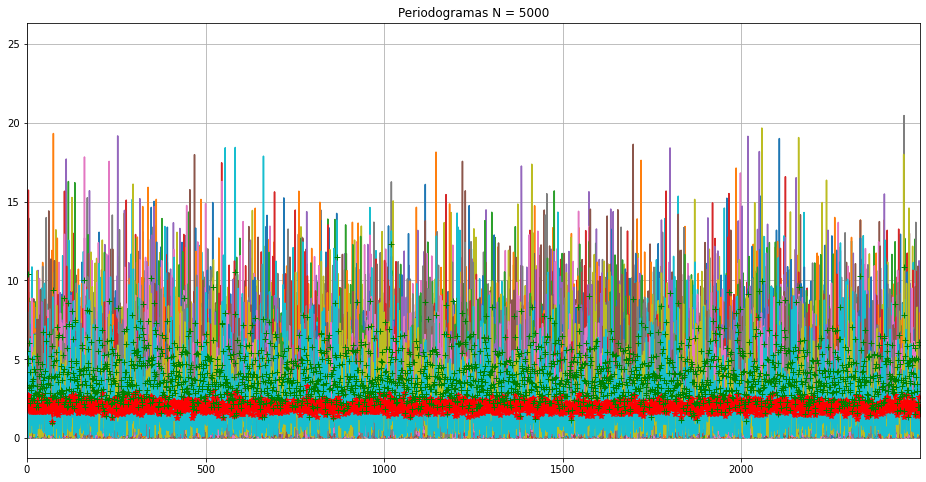

In [15]:
# Simular para los siguientes tamaños de señal
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.int)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

realizaciones = 50

media = 0
varianza = 2

plt.close('all')

tus_resultados_per = []

for nn in N:
    
    muestras = np.random.normal(media, np.sqrt(varianza), (nn, realizaciones))
    
    espectro = np.abs(np.fft.fft(muestras, axis=0))
    Periodograma = (espectro**2)/nn
    Periodograma = np.fft.fftshift(Periodograma, axes=0)
    
    frec = np.fft.fftfreq(Periodograma.shape[0],1/nn) #Normalizo en bins
    frec = np.fft.fftshift(frec)    
 
    Pxmean = np.mean(Periodograma,axis=1)
    Pxvar = np.var(Periodograma,axis=1)
 
    plt.figure()
    
    plt.plot(frec,Periodograma)
    plt.plot(frec,Pxmean,'r*--')
    plt.plot(frec,Pxvar,'g+')
    plt.title('Periodogramas N = %i' %nn )
    plt.xlim(0,nn/2-1)
    plt.grid()
    
    tus_resultados_per.append([np.mean(Pxmean)-varianza,np.mean(Pxvar)])


In [16]:

#######################################
# Tu simulación que genere resultados #
#######################################

#tus_resultados_per = [ 
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#                   ['', ''], # <-- acá debería haber numeritos :)
#              ]
df = DataFrame(tus_resultados_per, columns=['$s_P$', '$v_P$'],
               index=N)
HTML(df.to_html())


,$s_P$,$v_P$
10,-0.053376,3.457071
50,-0.103665,3.352295
100,-0.034487,3.883401
250,0.022080,3.924058
500,0.002023,3.888562
1000,-0.012049,3.855698
5000,-0.005246,3.882414


<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

In [24]:
# Simular para los siguientes tamaños de señal
N = 1000
K = np.array([2, 5, 10, 20, 50], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


In [25]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados_bartlett = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados_bartlett, columns=['$s_B$', '$v_B$'],
               index=K)
HTML(df.to_html())


,$s_B$,$v_B$
2.0,,
5.0,,
10.0,,
20.0,,
50.0,,


<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

In [26]:
# Simular para los siguientes tamaños de señal
N = 1000
slp = 50 # por ciento de ventanas adyacentes
K = np.array([2, 5, 10, 20, 50], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


In [27]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados_welch = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados_welch, columns=['$s_B$', '$v_B$'],
               index=K)
HTML(df.to_html())


,$s_B$,$v_B$
2.0,,
5.0,,
10.0,,
20.0,,
50.0,,


<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

In [ ]:
# Simular para los siguientes tamaños de señal

R = 200 # realizaciones

N = 1000 # Muestras

# Obtené los valores XX para que cumplas con el enunciado
#SNR = np.array([ XX, XX ], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [ ]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$i_W$', '$i_X$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())
